In [18]:
# First let's import the packages we will use in this project

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime as dt
from matplotlib.ticker import FuncFormatter


In [2]:
# Now we need to read in the data

df=pd.read_excel('/content/sample_data/Sample - Superstore.xlsx')


/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# Now let's take a look at the data

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [90]:
# Data Types for our columns

print(df.dtypes)

Row ID                      int64
Order ID                   object
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Ship Mode                  object
Customer ID                object
Customer Name              object
Segment                    object
Country/Region             object
City                       object
State                      object
Postal Code               float64
Region                     object
Product ID                 object
Category                   object
Sub-Category               object
Product Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Lead Time         timedelta64[ns]
dtype: object


In [14]:
# We need to see if we have any missing data
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [15]:
# We need to drop the null values 
df = df.dropna()

In [16]:
# We need to drop the duplicate Rows 
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


<Axes: >

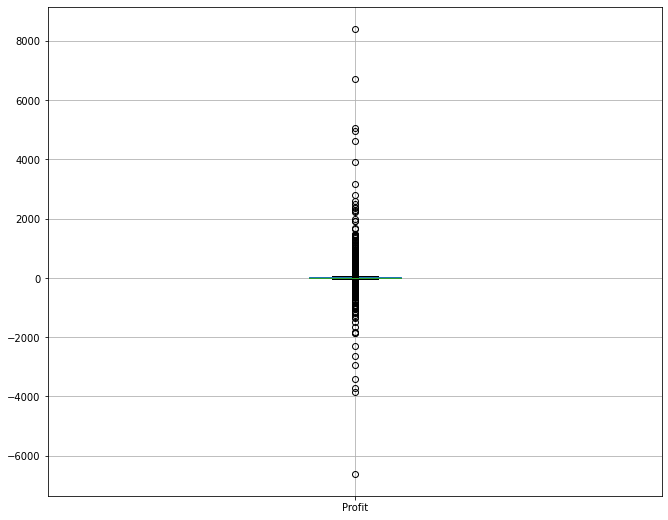

In [72]:
# Are there any Outliers?

df.boxplot(column=['Profit'])


In [107]:
# To know the best customers 

m=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False) 
m.head(5)

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

<Figure size 3600x720 with 0 Axes>

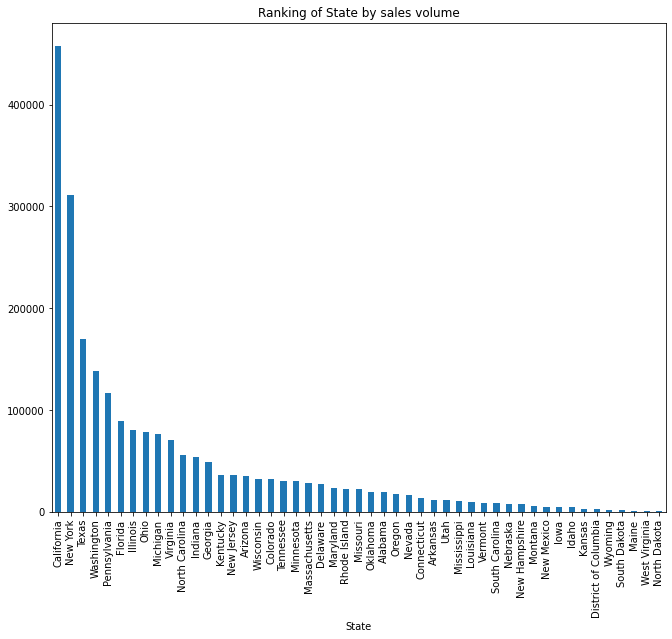

<Figure size 3600x720 with 0 Axes>

In [214]:
# To know the Ranking of State by sales volume
m=df.groupby('State')['Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Ranking of State by sales volume')
plt.figure(figsize=(50,10))


Text(0.5, 1.0, 'The demand  of Sub-Category')

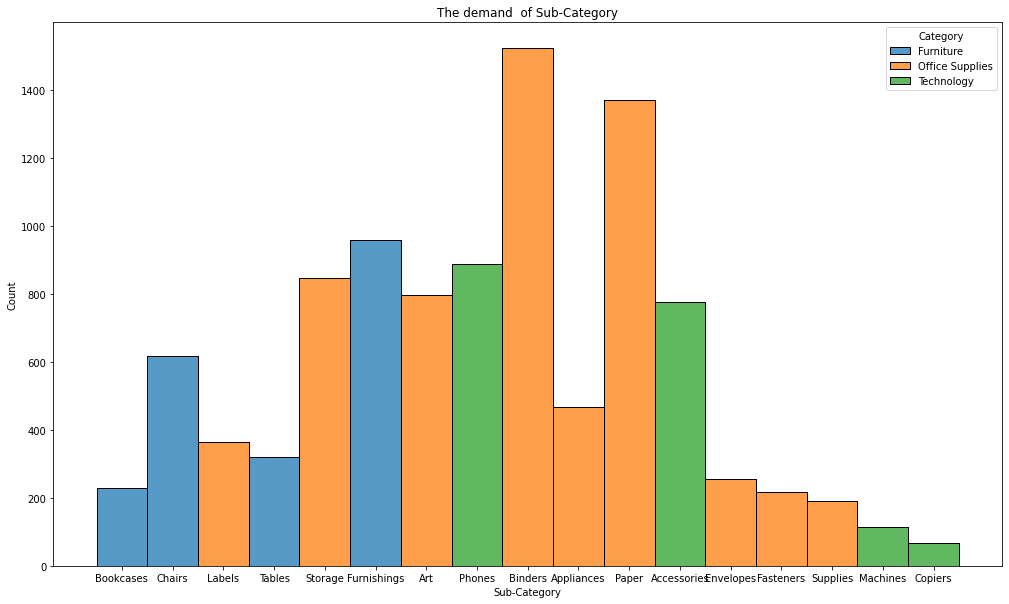

In [212]:
# To know the best  demand  of Sub-Category / Category
plt.figure(figsize=(17,10))
sns.histplot(data=df, x="Sub-Category", hue="Category", multiple="stack")
plt.title('The demand  of Sub-Category')


<ipython-input-49-c6a42aaf0f26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Sales' ,'Profit'].sum().plot.bar()


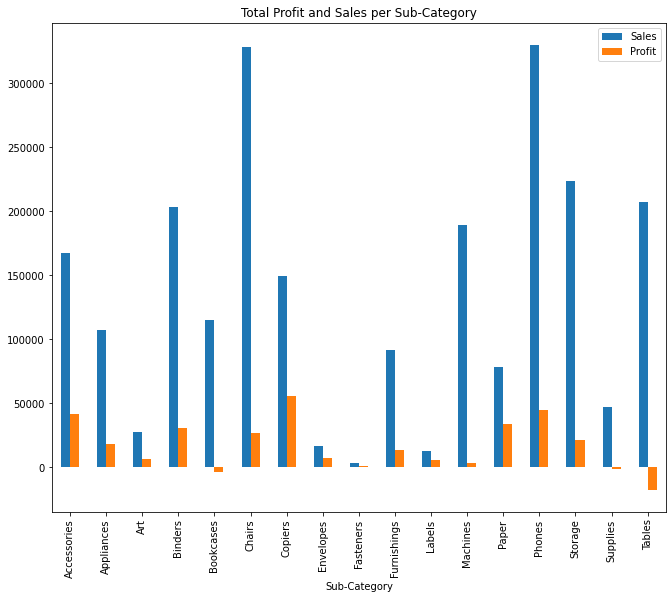

In [49]:
# To know the total profit and sales per sub-category
df.groupby('Sub-Category')['Sales' ,'Profit'].sum().plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize']=[11,9]

plt.show()

In [5]:
# Generate profit_percentage column 
df['profit_percentage'] = (df['Profit']/ df['Sales']) * 100

Text(0.5, 1.0, 'profit percentag per Sub-Categprofit_percentageory')

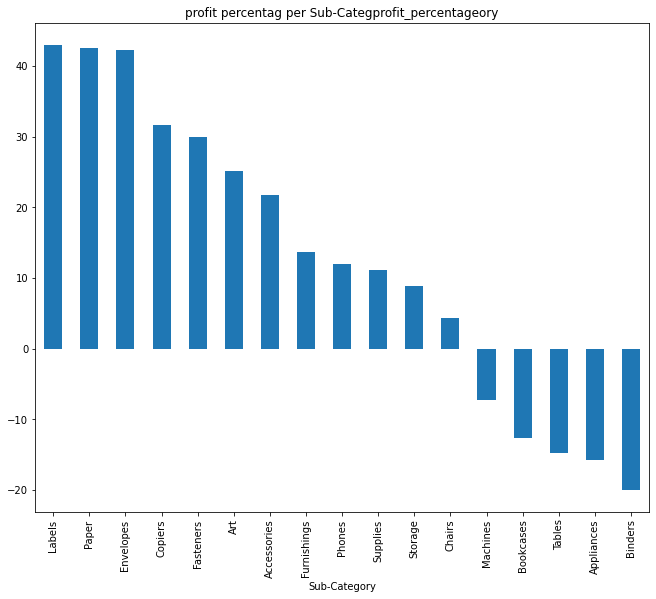

In [52]:
# To know the profit percentag depend on the sales volume

m=df.groupby('Sub-Category')['profit_percentage'].mean().sort_values(ascending=False).plot.bar()
plt.title('profit percentag per Sub-Categprofit_percentageory')




Text(0.5, 1.0, 'The realtion between profit and discount')

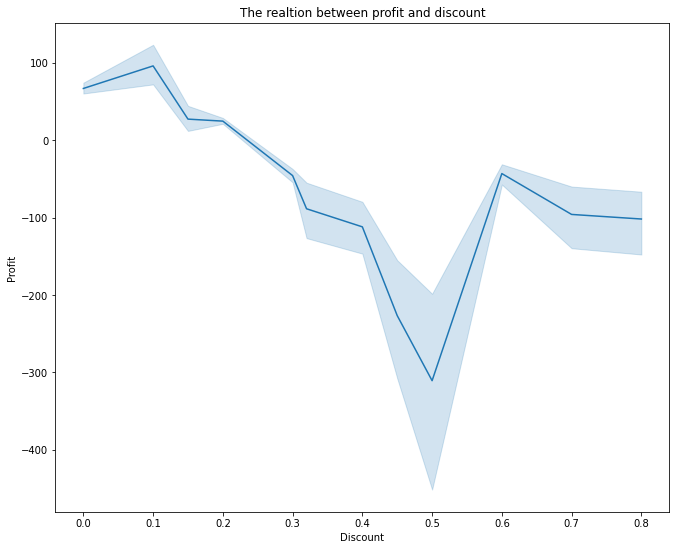

In [215]:
# To know the realtion between profit and discount 
sns.lineplot(data=df, x="Discount",y='Profit')
plt.title('The realtion between profit and discount')


Text(0.5, 1.0, ' The distribution of the target segments')

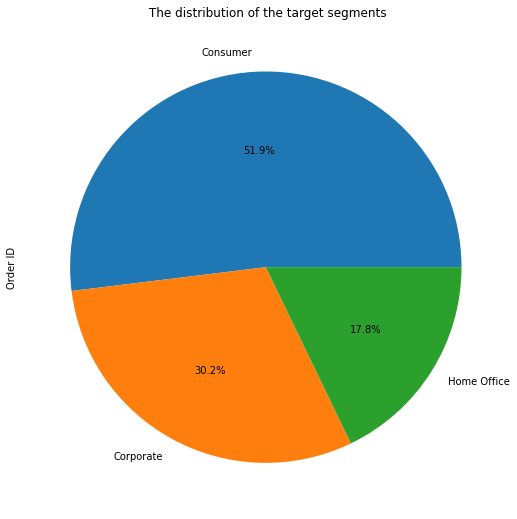

In [216]:
# To know the The distribution of the target segments

df.groupby('Segment')['Order ID'].count().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title(' The distribution of the target segments')


Text(0.5, 1.0, ' The distribution of the ship mode')

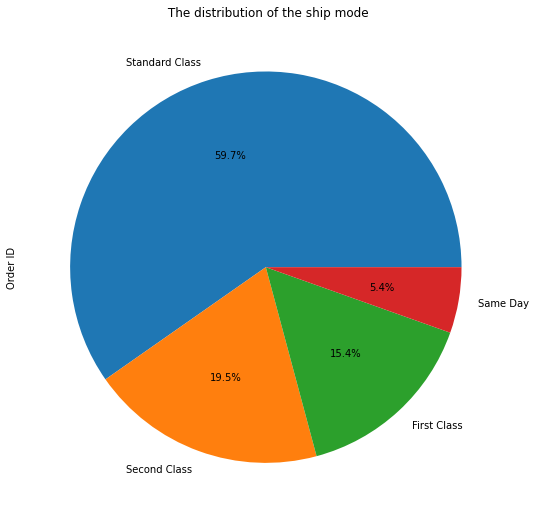

In [217]:
# To know the The distribution of the ship mode

df.groupby('Ship Mode')['Order ID'].count().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title(' The distribution of the ship mode')

In [153]:
# Generate Lead Time column 
#Lead time in shipping is the period of time between when an order is first received and when it reaches the customer

df['Lead Time'] = (df['Ship Date']-df['Order Date']).dt.days


<BarContainer object of 9994 artists>

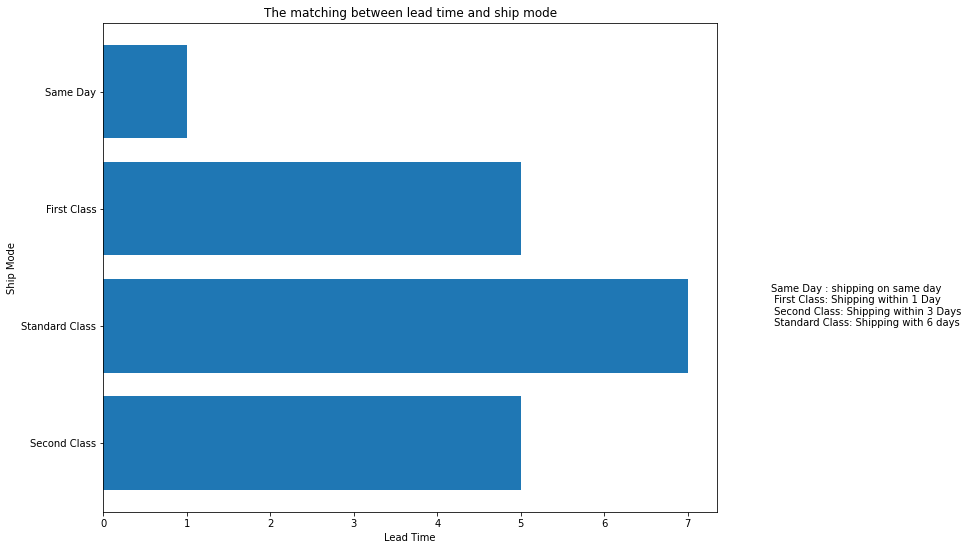

In [188]:
# To see the matching between lead time and ship mode

x=df['Ship Mode']
y=df['Lead Time']

plt.xlabel("Lead Time")
plt.ylabel("Ship Mode")
plt.title('The matching between lead time and ship mode')
plt.text(8, 1, "Same Day : shipping on same day \n First Class: Shipping within 1 Day \n Second Class: Shipping within 3 Days \n Standard Class: Shipping with 6 days ")
plt.barh(x, y)